Live Demo
---------

Let's implement a function that returns the $n$th element of a certain series. 

The first two elements of the series are given:

$$F_0 = 1, F_1 = 1$$

The function returns $F_n$ such that:

$$F_n = F_{n - 2} + F_{n - 1}$$

1 1 2

0 1
1 1
2 2
3 3
4 5
5 8
6 13
7 21
8 34
9 55


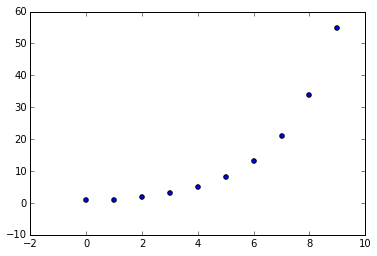

In [13]:
def fibonacci(n):
    if 0 <= n <= 1:
        return 1
    else:
        return fibonacci(n - 2) + fibonacci(n - 1) 

# check
print fibonacci(0), fibonacci(1), fibonacci(2)

# check again
print
for n in range(10):
    print n, fibonacci(n)

# plotting
%matplotlib inline
x = range(10)
y = [fibonacci(n) for n in x]

import matplotlib.pyplot as plt
plt.scatter(x, y)

NumPy
-----

NumPy provides the _ndarray_ object, which implements an efficient homogeneous multi-dimensional array type. 

In [1]:
import numpy as np

A = np.arange(6.).reshape(3, 2)
B = np.array([1, 0])

# element-wise
C = A * B

# matarix multiplication
D = np.dot(A, B)

See how fast it finds the maximum among a 1 million cells.

In [2]:
np.random.seed(1234)

print "numpy.ndarray"
M = np.random.rand(1000, 1000)                  
%time M.max()                                    

print "\nlist"
M2 = [M[i,j] for i in xrange(1000) for j in xrange(1000)]
%time max(M2)

numpy.ndarray
CPU times: user 569 µs, sys: 7 µs, total: 576 µs
Wall time: 586 µs

list
CPU times: user 27.8 ms, sys: 1.09 ms, total: 28.9 ms
Wall time: 28.9 ms


0.99999912003261893

NumPy has many built-in functions, for instance, Singular Value Decomposition can be as simple as:

In [3]:
a = np.random.randn(9, 6)
U, s, V = np.linalg.svd(a)
print U.shape, s.shape, V.shape

# check
S = np.zeros((9, 6))
S[:6, :6] = np.diag(s)
aa = np.dot(U, np.dot(S, V))
np.allclose(a, aa)

(9, 9) (6,) (6, 6)


True

SciPy libraries
---------------

An example from scipy.optimize module. Minimizing the Rosenbrock function of N variables:

$$f(\mathbf{x}) = \sum_{i=1}^{N-1} {100 (x_i - x_{i-1}^{2})^2 + (1 - x_{i-1})^2}.$$

The minimum value of this function is 0 which is achived when $x_i = 1$.

In [4]:
import numpy as np
from scipy.optimize import minimize

def rosen(x):
    return sum(100.0*(x[1:] - (x[:-1])**2.0)**2.0 + (1-x[:-1])**2.0)

# using simplex method
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = minimize(rosen, x0, method='nelder-mead', options={'xtol':1e-8, 'disp': True})
print res.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571
[ 1.  1.  1.  1.  1.]


R interface
-----------

From http://tinyurl.com/mf5m5ey. Requires R and rpy2 python module being already installed. (Rmagic is now a part of rpy2.)

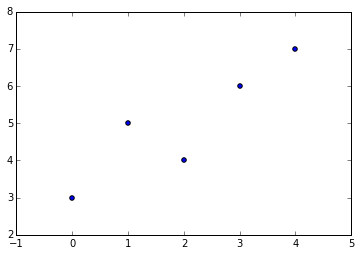

In [18]:
%matplotlib inline
%load_ext rpy2.ipython

import matplotlib.pyplot as plt

X = np.array(xrange(5))
Y = np.array([3, 5, 4, 6, 7])
plt.scatter(X, Y)

In [19]:
%Rpush X Y
%R lm(Y ~ X)$coef

<FloatVector - Python:0x10f8a4830 / R:0x10d00bd80>
[3.200000, 0.900000]

In [20]:
# check the coef's in python
Xr = X - X.mean()
Yr = Y - Y.mean()
slope = (Xr * Yr).sum() / (Xr**2).sum()
intercept = Y.mean() - X.mean() * slope
print "{0:.1f}, {1:.1f}".format(intercept, slope)

3.2, 0.9


In [21]:
a = %R resid(lm(Y ~ X))
print a

   1    2    3    4    5 
-0.2  0.9 -1.0  0.1  0.2 

